In [26]:
import requests
import astropy.io.fits as fits
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import astropy.units as u
import astropy.constants as const

In [29]:
orbit = fits.open("/mnt/sshfs/cdcihn/isdc/arc/rev_3/aux/adp/2121.001/orbit_historic.fits.gz")
t1=orbit[1].data['DAYBEG']*u.day
t2=orbit[1].data['DAYEND']*u.day
xyz = orbit[1].data['XYZPOS']*u.km

In [63]:
v_r = np.sum((xyz[1:]-xyz[:-1])**2, 1)**0.5 / ((t2-t1)[:-1])
beta = (v_r/const.c).si.value

In [64]:
beta

array([2.90476748e-05, 2.90139787e-05, 2.91138192e-05, 2.90922390e-05,
       2.90768033e-05, 2.90674427e-05, 2.90644484e-05, 2.91951749e-05,
       2.90760796e-05, 2.90912679e-05, 2.91123810e-05, 2.91396463e-05,
       2.90456345e-05, 2.90850497e-05, 2.91305826e-05, 2.90554804e-05,
       2.89870590e-05, 2.90509109e-05, 2.89953358e-05, 2.89466673e-05,
       2.89044825e-05, 2.89924239e-05, 2.88405449e-05, 2.88182609e-05,
       2.89245560e-05, 2.87942811e-05, 2.86727004e-05, 2.87968995e-05,
       2.85717839e-05, 2.87078278e-05, 2.85001510e-05, 2.85327029e-05,
       2.84573876e-05, 2.85036099e-05, 2.83315900e-05, 2.82807438e-05,
       2.82381348e-05, 2.82030492e-05, 2.80690470e-05, 2.80509115e-05,
       2.80407175e-05, 2.79342980e-05, 2.78380096e-05, 2.77517313e-05,
       2.76753185e-05, 2.76083525e-05, 2.75509351e-05, 2.74080943e-05,
       2.73706530e-05, 2.72501228e-05, 2.71414056e-05, 2.71334144e-05,
       2.69583558e-05, 2.68835595e-05, 2.68198839e-05, 2.66835212e-05,
      

(0.0, 1.9480350531097705e-05)

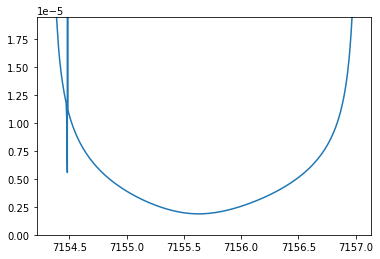

In [96]:
plt.figure()

plt.plot(t1[:-1], beta)

plt.ylim([0, np.percentile(beta,0.999)*10])

In [105]:
gamma = (1-beta**2)**0.5
(u.year/gamma - 1*u.year).to(u.ms)

<Quantity [1.33136421e+01, 1.32827684e+01, 1.33743385e+01, 1.33545221e+01,
           1.33403536e+01, 1.33317698e+01, 1.33290229e+01, 1.34491893e+01,
           1.33396879e+01, 1.33536322e+01, 1.33730211e+01, 1.33980788e+01,
           1.33117712e+01, 1.33479213e+01, 1.33897473e+01, 1.33207965e+01,
           1.32581311e+01, 1.33166062e+01, 1.32657059e+01, 1.32212102e+01,
           1.31827057e+01, 1.32630432e+01, 1.31244479e+01, 1.31041691e+01,
           1.32010225e+01, 1.30823767e+01, 1.29721255e+01, 1.30847521e+01,
           1.28809759e+01, 1.30039311e+01, 1.28164677e+01, 1.28457647e+01,
           1.27780332e+01, 1.28195788e+01, 1.26653155e+01, 1.26198948e+01,
           1.25818948e+01, 1.25506497e+01, 1.24316675e+01, 1.24156071e+01,
           1.24065888e+01, 1.23125943e+01, 1.22278563e+01, 1.21521786e+01,
           1.20853510e+01, 1.20269390e+01, 1.19769637e+01, 1.18530975e+01,
           1.18207313e+01, 1.17168566e+01, 1.16235488e+01, 1.16167028e+01,
           1.14672954e+01

# Relativisitc abberation effect on location

$cos(\theta_o) = \frac{cos(\theta_s) - \beta}{1 - \beta cos(\theta_s)}$

the effect is small but measurble, around 0.1 arcmin 10% of the time.
compare to 12 arcmin ISGRI PSF and 3 arcmin of JEM-X, bright sources would be affected.

Presumably, this is automatically corrected since star trackers are affected in the same way.


In [90]:
theta = np.pi/2.

d_theta = (np.arccos((np.cos(theta) - beta)/(1-beta*np.cos(theta))) - theta)/np.pi*180*60

np.quantile(d_theta,0.9)

0.09906253972114772